# **Task 1: AndMal2020-CDMC: Android Malware Detection**

The unrivalled threat of Android malware is the root cause of various security problems. Despite of tremendous research work, it is still menacing the cyber world. AndMal2020 is the collection of huge android malware samples that contains 12 malware categories and 191 malware families. The part of dataset presented here has a shape (61831x2497). The purpose of this dataset is to help evaluate models to early detect and characterize android malware. It is divided into training (51%) and testing set (49%) with following shape.

## **Dataset Shape**

The training set is labelled and contains malware family, malware category and malware labels as last three columns. However, testing set is not labelled. That is why the number of columns vary in dataset for testing and training set as mentioned above.

Following table quantifies the testing and training set for each malware category.

<table>
    <tr>
        <td rowspan="2">Malware Category</td>
        <td colspan="2">Number of Samples</td>
    </tr>
    <tr>
        <td>Testing Set</td>
        <td>Training Set</td>
    </tr>
    <tr>
        <td>Riskware</td>
        <td>17013</td>
        <td>16977</td>
    </tr>
    <tr>
        <td>Adware</td>
        <td>8258</td>
        <td>8134</td>
    </tr>
    <tr>
        <td>Ransomware</td>
        <td>805</td>
        <td>1093</td>
    </tr>
    <tr>
        <td>Banker</td>
        <td>122</td>
        <td>157</td>
    </tr>
    <tr>
        <td>propper</td>
        <td>318</td>
        <td>412</td>
    </tr>
    <tr>
        <td>Spyware</td>
        <td>469</td>
        <td>617</td>
    </tr>
    <tr>
        <td>Trojan</td>
        <td>2307</td>
        <td>2398</td>
    </tr>
    <tr>
        <td>SMS</td>
        <td>399</td>
        <td>542</td>
    </tr>
    <tr>
        <td>Scareware</td>
        <td>203</td>
        <td>287</td>
    </tr>
    <tr>
        <td>PUA</td>
        <td>260</td>
        <td>373</td>
    </tr>
    <tr>
        <td>Backdoor</td>
        <td>192</td>
        <td>287</td>
    </tr>
    <tr>
        <td>Filelnfector</td>
        <td>81</td>
        <td>127</td>
    </tr>
    <tr>
        <td>Total Samples</td>
        <td>30427</td>
        <td>31404</td>
    </tr>
</table>


Note that:

- The captured malware data is a matrix of strings, integers, and float numbers. The hash of every sample in testing set is presented in last column whereas the hash of every samples in training set is presented in fourth last column.

- The data is stored in “.csv” file, which can be read as a pure text file. The file name represents the training and testing data.

- The data structure of the training file is given as:

  ![training](.././Data/Figures/training.png)

- The data structure of the testing file is given as:

  ![testing](.././Data/Figures/testing.png)

## Import packages and dependencies

In [1]:
import joblib
import lightgbm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scikitplot as skplt
import xgboost
from xgboost import plot_importance
from imblearn.combine import SMOTETomek
from sklearn import manifold, neighbors
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC, OneClassSVM
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# !conda install lightgbm
# !conda install -c conda-forge scikit-plot
# !conda install joblib
# !pip install sentencepiece
# !pip install imblearn

## Data preprocessing

In [63]:
df = pd.read_csv('.././Data/AndroidMalware_Training_set.csv', header=None)

In [64]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496
0,84,0,0.0,14,22,11,2,28,12,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,294a061bec0390ef023272fd6674a5f1,smsreg,Riskware,Malware
1,84,0,0.0,3,22,16,7,28,7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,e4c183e206c81a642711390b3fde726a,skymobi,Riskware,Malware
2,84,0,0.0,15,22,13,3,31,13,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,37df9abce3505fc76451cc9ca9aaa5ab,smsreg,Riskware,Malware
3,173,0,0.0,54,19,7,0,36,7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,25977ca22801acdbb90ea514db86a669,airpush,Adware,Malware
4,119,0,0.0,4,25,19,16,45,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5478deddd0a3a7ae794e466c016d585c,smsreg,Riskware,Malware
5,84,0,0.0,16,22,13,3,31,13,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,75c79475984122a9a87baa07c747520f,smsreg,Riskware,Malware
6,956,0,0.0,23,93,6,11,26,12,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,cab15a9c245d772782fde319ee242b88,jiagu,Riskware,Malware
7,84,0,0.0,14,22,11,2,28,12,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,ba401136542e05b6b9d06d5be12cb0ba,smsreg,Riskware,Malware
8,84,0,0.0,3,20,14,8,28,7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,88b8284ce0dd890800622aee3aa27af9,shedun,Adware,Malware
9,14,0,0.0,776,3,5,0,26,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,c246bf1e7701e9f1ba971949f1bd8c2e,shedun,Adware,Malware


In [65]:
# Named columns
columns_data = ['data'+str(x) for x in range(2493)]
columns_all = columns_data + \
    ['hash', 'malware family', 'malware category', 'malware class']
df.columns = columns_all

In [66]:
df.isnull().sum(axis=1).value_counts()  # Check for rows with missing values.

0      31404
453        1
dtype: int64

In [67]:
df.dropna(inplace=True)  # Remove missing values

In [32]:
# Delete rows and columns with all 0 values
df = df.loc[(df.sum(axis=1) != 0), (df.sum(axis=0) != 0)]

In [7]:
df['malware class'].unique()  # Check if it's all malware

array(['Malware'], dtype=object)

In [10]:
# LabelEncoder
df['malware category'] = LabelEncoder().fit_transform(df['malware category'])
# df['malware family'] = LabelEncoder().fit_transform(df['malware family'])

In [68]:
# df.drop(['hash', 'malware family', 'malware class'], axis=1, inplace=True)
df.drop(['hash', 'malware class'], axis=1, inplace=True)

In [70]:
# Divide training data and training target
data = df.iloc[:, :-2]
# target = df['malware category']
target = df['malware family']

In [16]:
# Divide the validation set and test set.
# x_train, x_val, y_train, y_val = train_test_split(
#     data, target, test_size=0.2, stratify=target, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(
    data, target, test_size=0.2, random_state=0)

In [11]:
# x_train.to_csv('x_train.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# x_val.to_csv('x_val.csv', index=False)
# y_val.to_csv('y_val.csv', index=False)

In [14]:
# Dimensionality reduction
pca = PCA(n_components=30)
pca_results = pca.fit_transform(data)

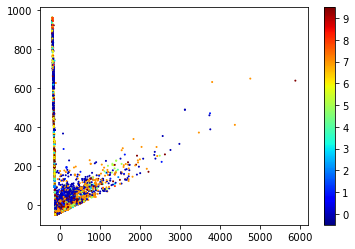

In [18]:
fig = plt.figure()
plt.scatter(pca_results[:, 0], pca_results[:, 1],
            c=LabelEncoder().fit_transform(target), s=1, cmap=plt.cm.get_cmap("jet"))
plt.colorbar(ticks=range(12))
plt.clim(-0.5, 9.5)
plt.show()
fig.savefig('../Data/Figures/pca.eps')

In [19]:
joblib.dump(pca, '.././Data/pca_mle.m')

['.././Data/pca_mle.m']

In [20]:
df_test = pd.read_csv('.././Data/AndroidMalware_Testing_set.csv', header=None)

In [21]:
val_pca = joblib.load('.././Data/pca_mle.m')
X_val = val_pca.transform(df_test.iloc[:-1,:-1])

In [104]:
val_pca = joblib.load('.././Data/pca_mle.m')
X_train = val_pca.transform(data)

In [105]:
X_train = pd.DataFrame(X_train)

In [106]:
X_train['malware category'] = df['malware category']

In [107]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,malware category
0,-31.817759,-31.252485,-2.651573,-0.256758,-8.766717,2.518834,-3.767333,-0.038625,-1.932298,-0.113865,...,0.024023,0.381822,-0.316756,-0.076697,0.313366,0.104646,-0.072629,0.158556,-0.212907,Riskware
1,-30.871577,-42.263195,-3.121378,-0.224357,-9.110245,1.291507,-1.543512,8.449316,2.075315,-0.046706,...,0.171462,-0.137326,-0.137085,1.030230,0.611877,0.721786,0.014808,0.188653,0.286885,Riskware
2,-31.869934,-30.353871,-5.999075,-0.084952,-7.441606,3.324100,-4.183131,1.500956,-1.910081,-0.084646,...,0.080530,-0.306006,0.185341,0.059382,-0.312873,-0.171253,-0.010885,-0.087307,0.257387,Riskware
3,53.468260,15.881977,-6.159270,-0.541493,-1.542737,-5.951298,0.063658,-1.771794,-2.857580,-0.299404,...,-0.512701,-0.205374,-0.379621,-0.266089,1.067491,-0.223705,-0.187498,-0.723180,-0.098031,Adware
4,4.168911,-38.901428,-21.122674,0.503889,-3.224432,2.652576,4.424389,14.295017,6.533835,-0.520023,...,-0.012908,0.206100,-0.839136,0.017567,-0.525768,0.047817,-0.021387,-0.129547,-0.411092,Riskware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31399,-112.731161,-51.049853,-6.085381,0.400624,7.782245,12.195183,2.676738,-5.359391,1.392018,-0.189728,...,-0.044068,-0.064477,-0.200633,0.066208,0.116069,0.079186,0.323534,0.037233,-0.027974,Riskware
31400,-38.932374,-21.258235,16.496070,-1.200677,-10.363851,-0.102444,-3.075198,2.837665,-0.011929,1.264240,...,0.063745,-0.489326,-0.405895,-0.641805,-0.114438,0.392616,-0.358645,-0.117091,0.214373,Riskware
31401,-31.817759,-31.252485,-2.651573,-0.256758,-8.766717,2.518834,-3.767333,-0.038625,-1.932298,-0.113865,...,0.024023,0.381822,-0.316756,-0.076697,0.313366,0.104646,-0.072629,0.158556,-0.212907,Riskware
31402,-113.328096,-47.506045,13.601595,-0.583284,6.237192,6.570448,0.871710,-6.321563,0.182836,0.156627,...,-0.634110,0.197421,-1.316927,-0.336662,-0.209509,0.612596,0.331773,0.272450,-0.144567,Ransomware


In [22]:
X_train = pd.DataFrame(pca_results, columns=None)
X_val = pd.DataFrame(X_val, columns=None)

In [24]:
# Use SMOTE + Tomek links method for comprehensive sampling to solve sample imbalance.
smote_tomek = SMOTETomek(random_state=0, n_jobs=-1)
X_resampled, y_resampled = smote_tomek.fit_sample(X_train, target)

In [26]:
# Save as local document
X_resampled.to_csv('.././Data/X_resampled.csv', index=False)
y_resampled.to_csv('.././Data/y_resampled.csv', index=False)
X_val.to_csv('.././Data/X_val.csv', index=False)
df_test.iloc[:-1,-1:].to_csv('.././Data/y_val.csv', index=False)

## Model training

In [103]:
# Read data set
X_train = pd.read_csv('.././Data/X_resampled.csv')
y_train = pd.read_csv('.././Data/y_resampled.csv')
X_val = pd.read_csv('.././Data/X_val.csv')
y_val = pd.read_csv('.././Data/y_val.csv')

In [28]:
kfold = KFold(n_splits=5, random_state=0, shuffle=True)  # cv

In [29]:
# Confusion matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title,
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix
    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']
    title:        the text to display at the top of the matrix
    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see:
                  http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues
    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    Usage
    -----
    plot_confusion_matrix(cm = cm, 
                           normalize = True, # show proportions
                          target_names = y_labels_vals, # list of classes names
                          title = best_estimator_name) # title of graph
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(
        accuracy, misclass))
    plt.savefig(str('.././Data/Figures/'+title+'.pdf'), bbox_inches='tight',
                pad_inches=0.0, dpi=200)
    plt.show()

### XGBoost

In [30]:
xgb = xgboost.XGBClassifier()
xgb_results = cross_validate(
    xgb, X_train.values, y_train.values.ravel(), cv=kfold, scoring=['accuracy', 'f1_macro'], n_jobs=-1)
joblib.dump(xgb_results, '.././Data/xgb_results.m')

['.././Data/xgb_results.m']

In [31]:
joblib.load('.././Data/xgb_results.m')
print(xgb_results)

{'fit_time': array([446.49804974, 447.94715381, 446.59479141, 447.55221272,
       446.34744358]), 'score_time': array([4.3722434 , 4.23997211, 4.36721802, 4.27437091, 4.35131001]), 'test_accuracy': array([0.96186493, 0.96159429, 0.96144572, 0.9606338 , 0.95972345]), 'test_f1_macro': array([0.96220635, 0.96191114, 0.96190662, 0.96118858, 0.96011559])}


In [ ]:
xgb.fit(X_train.values, y_train.values.ravel())
joblib.dump(xgb, ".././Data/xgb_features.m")

In [90]:
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, max_num_features=20)

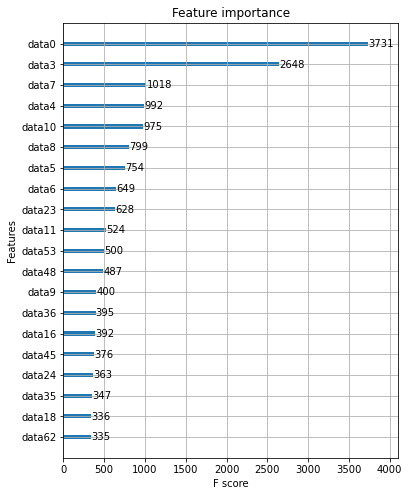

In [94]:
plot_features(xgb, (6,8))
plt.savefig('FEATURE.eps', bbox_inches='tight')

In [83]:
import operator

xgb_params = {"eta": 0.01}
num_rounds = 1000

dtrain = xgboost.DMatrix(X_train, label=y_train)
xgb = xgboost.train(xgb_params, dtrain, num_rounds)

importance = xgb.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])

# xgb_fea_imp=pd.DataFrame(list(xgb.get_booster().get_fscore().items()),
# columns=['feature','importance']).sort_values('importance', ascending=False)

In [84]:
features = df[df['fscore']>300]['feature'].tolist()
joblib.dump(features, ".././Data/features.m")

['.././Data/features.m']

In [85]:
df

,feature,fscore
0,data114,1
1,data770,1
2,data1996,1
3,data226,1
4,data1979,1
...,...,...
298,data10,975
299,data4,992
300,data7,1018
301,data3,2648


In [ ]:
xgb = joblib.load(".././Data/xgb.m")
xgb_y_prob = xgb.predict_proba(X_val)
xgb_y_pre = xgb.predict(X_val.values)

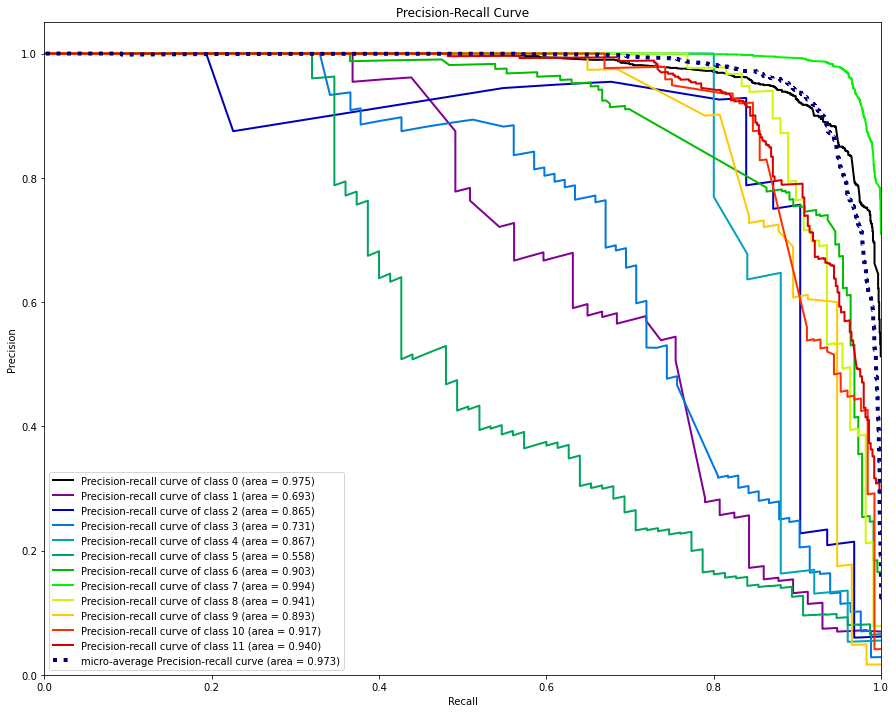

0.9186305732484077


In [62]:
skplt.metrics.plot_precision_recall(y_val, xgb_y_prob, figsize=(15, 12))
plt.show()
print(accuracy_score(y_val, xgb_y_pre))

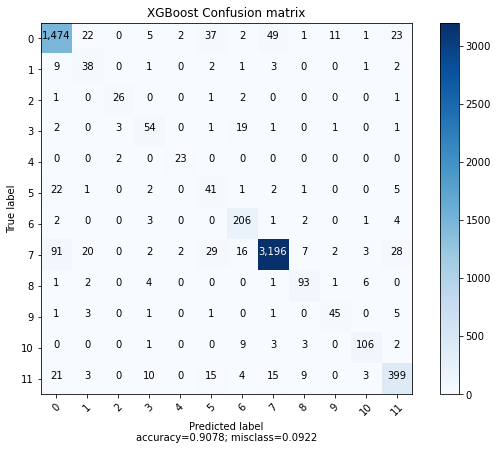

In [40]:
xgb_cm = confusion_matrix(y_val, xgb_y_pre)
plot_confusion_matrix(xgb_cm, range(12),
                      title='XGBoost Confusion matrix',
                      cmap=None,
                      normalize=False)

In [ ]:
print(classification_report(y_val, xgb_y_pre))

### LightGBM

In [32]:
lgb = lightgbm.LGBMClassifier()
lgb_results = cross_validate(
    lgb, X_train.values, y_train.values.ravel(), cv=kfold, scoring=['accuracy', 'f1_macro'])
joblib.dump(lgb_results, '.././Data/lgb_results.m')

['.././Data/lgb_results.m']

In [33]:
joblib.load('.././Data/lgb_results.m')
print(lgb_results)

{'fit_time': array([4.93842077, 4.55744004, 4.21524191, 4.3519671 , 4.15342093]), 'score_time': array([0.5755167 , 0.55109072, 0.55907178, 0.58350468, 0.55804443]), 'test_accuracy': array([0.95969984, 0.95839587, 0.95844405, 0.95711544, 0.95647574]), 'test_f1_macro': array([0.96004824, 0.95871801, 0.95888384, 0.95762039, 0.95686065])}


In [ ]:
lgb.fit(X_train.values, y_train.values.ravel())
joblib.dump(lgb, ".././Data/lgb.m")

In [ ]:
lgb = joblib.load(".././Data/lgb.m")
lgb_y_prob = lgb.predict_proba(X_val)
lgb_y_pre = lgb.predict(X_val.values)

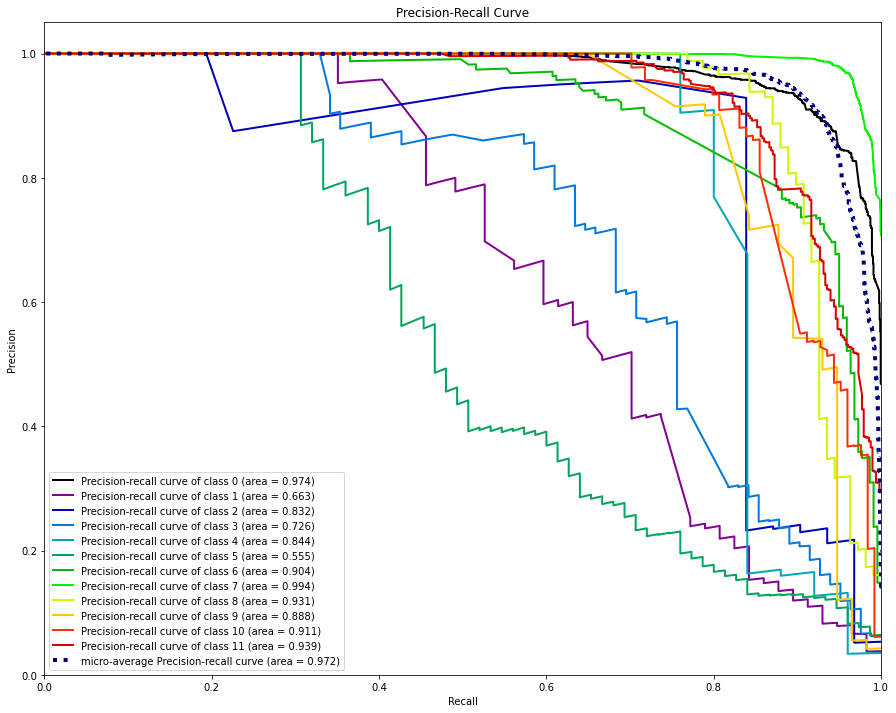

0.9157643312101911


In [55]:
skplt.metrics.plot_precision_recall(y_val, lgb_y_prob, figsize=(15, 12))
plt.show()
print(accuracy_score(y_val, lgb_y_pre))

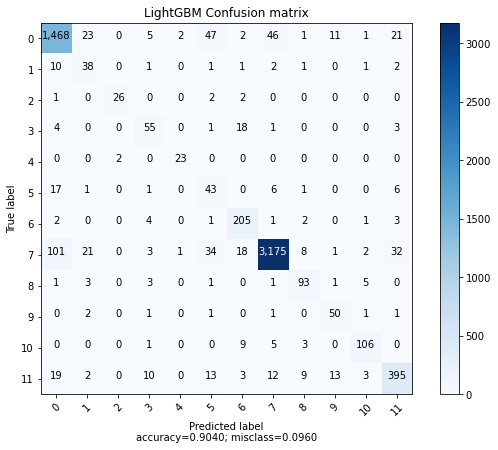

In [43]:
lgb_cm = confusion_matrix(y_val, lgb_y_pre)
plot_confusion_matrix(lgb_cm, range(12),
                      title='LightGBM Confusion matrix',
                      cmap=None,
                      normalize=False)

In [ ]:
print(classification_report(y_val, lgb_y_pre))

### KNN

In [78]:
knn = neighbors.KNeighborsClassifier()
knn_results = cross_val_score(
    knn, X_train.values, y_train.values.ravel(), cv=kfold, scoring='accuracy')
joblib.dump(knn_results, '.././Data/knn_results.m')

['.././Data/knn_results.m']

In [79]:
joblib.load('.././Data/knn_results.m')
print(knn_results)

[0.93583513 0.94238519 0.94244671 0.93672521 0.93709434]


In [35]:
knn.fit(X_train.values, y_train.values.ravel())
joblib.dump(knn, '.././Data/knn.m')

['knn.m']

In [44]:
knn = joblib.load(".././Data/knn.m")
knn_y_prob = knn.predict_proba(X_val)
knn_y_pre = knn.predict(X_val)

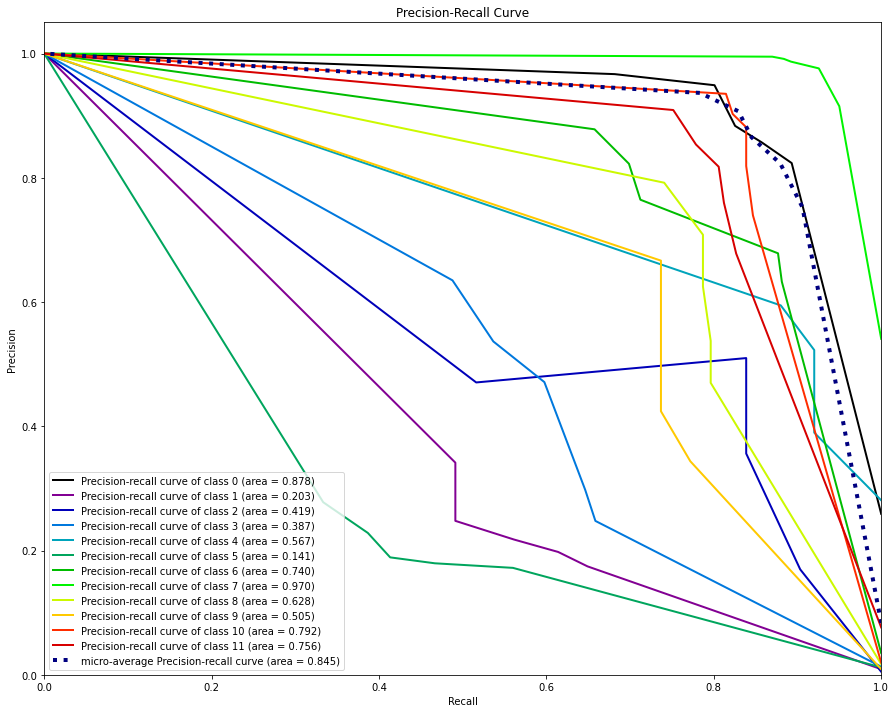

0.8495222929936306


In [9]:
skplt.metrics.plot_precision_recall(y_val, knn_y_prob, figsize=(15, 12))
plt.show()
print(accuracy_score(y_val, knn_y_pre))

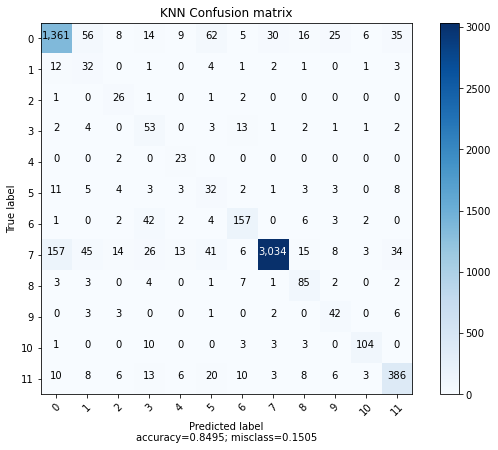

In [45]:
knn_cm = confusion_matrix(y_val, knn_y_pre)
plot_confusion_matrix(knn_cm, range(12),
                      title='KNN Confusion matrix',
                      cmap=None,
                      normalize=False)

In [26]:
print(classification_report(y_val, knn_y_pre))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1627
           1       0.21      0.56      0.30        57
           2       0.40      0.84      0.54        31
           3       0.32      0.65      0.43        82
           4       0.41      0.92      0.57        25
           5       0.19      0.43      0.26        75
           6       0.76      0.72      0.74       219
           7       0.99      0.89      0.94      3396
           8       0.61      0.79      0.69       108
           9       0.47      0.74      0.57        57
          10       0.87      0.84      0.85       124
          11       0.81      0.81      0.81       479

    accuracy                           0.85      6280
   macro avg       0.57      0.75      0.63      6280
weighted avg       0.89      0.85      0.87      6280



### SVM

In [82]:
joblib.load('.././Data/svm_results.m')
print(svm_results)

[0.90892033 0.90907133 0.90953274 0.91128611 0.91583869]


In [11]:
svm.fit(X_train.values, y_train.values.ravel())
joblib.dump(svm, '.././Data/svm.m')

['.././Data/svm.m']

In [47]:
svm = joblib.load(".././Data/svm.m")
svm_y_prob = svm.predict_proba(X_val)
svm_y_pre = svm.predict(X_val)

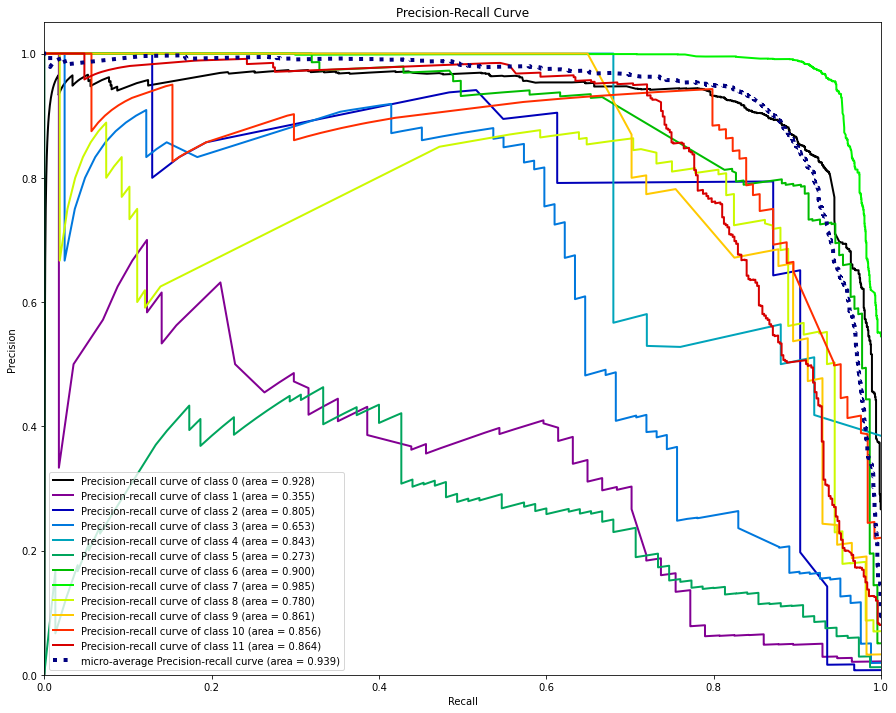

0.8742038216560509


In [13]:
skplt.metrics.plot_precision_recall(y_val, svm_y_prob, figsize=(15, 12))
plt.show()
print(accuracy_score(y_val, svm_y_pre))

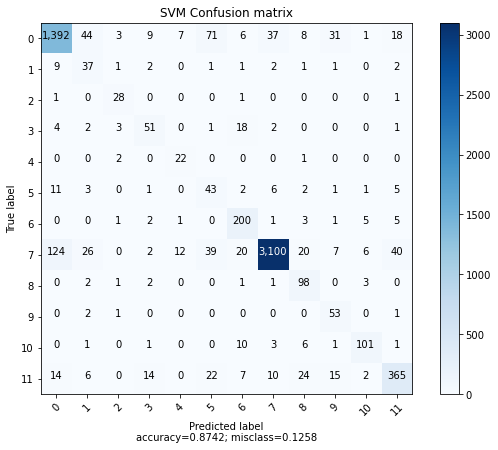

In [48]:
svm_cm = confusion_matrix(y_val, svm_y_pre)
plot_confusion_matrix(svm_cm, range(12),
                      title='SVM Confusion matrix',
                      cmap=None,
                      normalize=False)

In [27]:
print(classification_report(y_val, svm_y_pre))

              precision    recall  f1-score   support

           0       0.90      0.86      0.87      1627
           1       0.30      0.65      0.41        57
           2       0.70      0.90      0.79        31
           3       0.61      0.62      0.61        82
           4       0.52      0.88      0.66        25
           5       0.24      0.57      0.34        75
           6       0.75      0.91      0.82       219
           7       0.98      0.91      0.95      3396
           8       0.60      0.91      0.72       108
           9       0.48      0.93      0.63        57
          10       0.85      0.81      0.83       124
          11       0.83      0.76      0.80       479

    accuracy                           0.87      6280
   macro avg       0.65      0.81      0.70      6280
weighted avg       0.90      0.87      0.88      6280



### Randomforest

In [34]:
rf = RandomForestClassifier()
rf_results = cross_validate(
    rf, X_train.values, y_train.values.ravel(), cv=kfold, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])
joblib.dump(rf_results, '.././Data/rf_results.m')

['.././Data/rf_results.m']

In [35]:
joblib.load('.././Data/rf_results.m')
print(rf_results)

{'fit_time': array([48.83638954, 47.66890192, 47.74158359, 48.4979074 , 47.39894724]), 'score_time': array([1.05414772, 1.04355502, 1.04831386, 1.04897308, 1.05475736]), 'test_accuracy': array([0.9639316 , 0.96297208, 0.96274973, 0.96156874, 0.96080602]), 'test_f1_macro': array([0.96428297, 0.9633165 , 0.96322216, 0.96214277, 0.96119358]), 'test_precision_macro': array([0.96614305, 0.96528006, 0.96539362, 0.96457133, 0.96345595]), 'test_recall_macro': array([0.96384808, 0.96305592, 0.96270958, 0.96156622, 0.96077272])}


In [36]:
rf.fit(X_train.values, y_train.values.ravel())
joblib.dump(rf, '.././Data/rf.m')

['.././Data/rf.m']

In [37]:
rf = joblib.load(".././Data/rf.m")
rf_y_prob = rf.predict_proba(X_val)
rf_y_pre = rf.predict(X_val.values)

In [38]:
pd.DataFrame(rf_y_pre).to_csv('AndroidMalware_category_predict.csv', header=False)

In [108]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,malware category
0,-31.817759,-31.252485,-2.651573,-0.256758,-8.766717,2.518834,-3.767333,-0.038625,-1.932298,-0.113865,...,0.024023,0.381822,-0.316756,-0.076697,0.313366,0.104646,-0.072629,0.158556,-0.212907,Riskware
1,-30.871577,-42.263195,-3.121378,-0.224357,-9.110245,1.291507,-1.543512,8.449316,2.075315,-0.046706,...,0.171462,-0.137326,-0.137085,1.030230,0.611877,0.721786,0.014808,0.188653,0.286885,Riskware
2,-31.869934,-30.353871,-5.999075,-0.084952,-7.441606,3.324100,-4.183131,1.500956,-1.910081,-0.084646,...,0.080530,-0.306006,0.185341,0.059382,-0.312873,-0.171253,-0.010885,-0.087307,0.257387,Riskware
3,53.468260,15.881977,-6.159270,-0.541493,-1.542737,-5.951298,0.063658,-1.771794,-2.857580,-0.299404,...,-0.512701,-0.205374,-0.379621,-0.266089,1.067491,-0.223705,-0.187498,-0.723180,-0.098031,Adware
4,4.168911,-38.901428,-21.122674,0.503889,-3.224432,2.652576,4.424389,14.295017,6.533835,-0.520023,...,-0.012908,0.206100,-0.839136,0.017567,-0.525768,0.047817,-0.021387,-0.129547,-0.411092,Riskware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31399,-112.731161,-51.049853,-6.085381,0.400624,7.782245,12.195183,2.676738,-5.359391,1.392018,-0.189728,...,-0.044068,-0.064477,-0.200633,0.066208,0.116069,0.079186,0.323534,0.037233,-0.027974,Riskware
31400,-38.932374,-21.258235,16.496070,-1.200677,-10.363851,-0.102444,-3.075198,2.837665,-0.011929,1.264240,...,0.063745,-0.489326,-0.405895,-0.641805,-0.114438,0.392616,-0.358645,-0.117091,0.214373,Riskware
31401,-31.817759,-31.252485,-2.651573,-0.256758,-8.766717,2.518834,-3.767333,-0.038625,-1.932298,-0.113865,...,0.024023,0.381822,-0.316756,-0.076697,0.313366,0.104646,-0.072629,0.158556,-0.212907,Riskware
31402,-113.328096,-47.506045,13.601595,-0.583284,6.237192,6.570448,0.871710,-6.321563,0.182836,0.156627,...,-0.634110,0.197421,-1.316927,-0.336662,-0.209509,0.612596,0.331773,0.272450,-0.144567,Ransomware


In [110]:
X_val['malware category'] = rf_y_pre

In [114]:
X_val

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,malware category
0,-31.869934,-30.353871,-5.999075,-0.084952,-7.441606,3.324100,-4.183131,1.500956,-1.910081,-0.084646,...,0.080530,-0.306006,0.185341,0.059382,-0.312873,-0.171253,-0.010885,-0.087307,0.257387,Riskware
1,-78.150848,-46.303216,-11.396261,0.545400,16.557271,2.966418,3.593527,-6.558025,-0.583960,-0.216582,...,0.694895,-0.038728,-1.277501,0.558490,-0.892351,0.124730,-0.083675,-1.230462,0.986100,Adware
2,451.205924,61.816420,-5.331910,-1.878911,1.717998,8.356368,1.386674,-6.019114,1.852878,-0.216764,...,0.807700,0.470693,-0.099714,0.218793,-1.272785,0.411820,0.169710,-0.522065,0.095511,PUA
3,193.020655,-22.783157,-5.694116,-1.317939,10.379104,7.594266,-0.025412,1.546124,4.140746,0.414829,...,-0.452518,-0.117126,0.060300,-0.059166,-0.189571,0.008442,-0.176982,-0.065317,-0.001373,Riskware
4,-186.141776,881.664546,1.755895,0.294012,-4.070621,-0.807401,2.507127,2.019061,2.979866,-0.062685,...,0.502610,0.310623,0.022595,-0.093528,-0.234353,0.489280,-0.636070,0.256302,0.725140,Trojan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30423,-31.817759,-31.252485,-2.651573,-0.256758,-8.766717,2.518834,-3.767333,-0.038625,-1.932298,-0.113865,...,0.024023,0.381822,-0.316756,-0.076697,0.313366,0.104646,-0.072629,0.158556,-0.212907,Riskware
30424,193.020655,-22.783157,-5.694116,-1.317939,10.379104,7.594266,-0.025412,1.546124,4.140746,0.414829,...,-0.452518,-0.117126,0.060300,-0.059166,-0.189571,0.008442,-0.176982,-0.065317,-0.001373,Riskware
30425,-21.154271,-40.422125,-40.680975,1.775973,21.469567,-6.844346,-2.250782,-3.778173,-3.832347,0.180096,...,-0.069995,-0.260101,0.385321,0.319786,-0.151240,0.773634,-0.525393,0.225675,-0.018826,Adware
30426,165.953115,-24.576947,9.746573,-1.974235,5.006053,9.696095,-0.107614,-0.365030,3.472994,0.159758,...,1.612771,-0.352096,0.925208,-0.506879,1.868074,-0.670204,0.012953,0.098433,-0.641955,Riskware


In [116]:
X_train.columns = X_val.columns
tmp = pd.concat([X_train,X_val])

In [117]:
tmp

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,malware category
0,-31.817759,-31.252485,-2.651573,-0.256758,-8.766717,2.518834,-3.767333,-0.038625,-1.932298,-0.113865,...,0.024023,0.381822,-0.316756,-0.076697,0.313366,0.104646,-0.072629,0.158556,-0.212907,Riskware
1,-30.871577,-42.263195,-3.121378,-0.224357,-9.110245,1.291507,-1.543512,8.449316,2.075315,-0.046706,...,0.171462,-0.137326,-0.137085,1.030230,0.611877,0.721786,0.014808,0.188653,0.286885,Riskware
2,-31.869934,-30.353871,-5.999075,-0.084952,-7.441606,3.324100,-4.183131,1.500956,-1.910081,-0.084646,...,0.080530,-0.306006,0.185341,0.059382,-0.312873,-0.171253,-0.010885,-0.087307,0.257387,Riskware
3,53.468260,15.881977,-6.159270,-0.541493,-1.542737,-5.951298,0.063658,-1.771794,-2.857580,-0.299404,...,-0.512701,-0.205374,-0.379621,-0.266089,1.067491,-0.223705,-0.187498,-0.723180,-0.098031,Adware
4,4.168911,-38.901428,-21.122674,0.503889,-3.224432,2.652576,4.424389,14.295017,6.533835,-0.520023,...,-0.012908,0.206100,-0.839136,0.017567,-0.525768,0.047817,-0.021387,-0.129547,-0.411092,Riskware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30423,-31.817759,-31.252485,-2.651573,-0.256758,-8.766717,2.518834,-3.767333,-0.038625,-1.932298,-0.113865,...,0.024023,0.381822,-0.316756,-0.076697,0.313366,0.104646,-0.072629,0.158556,-0.212907,Riskware
30424,193.020655,-22.783157,-5.694116,-1.317939,10.379104,7.594266,-0.025412,1.546124,4.140746,0.414829,...,-0.452518,-0.117126,0.060300,-0.059166,-0.189571,0.008442,-0.176982,-0.065317,-0.001373,Riskware
30425,-21.154271,-40.422125,-40.680975,1.775973,21.469567,-6.844346,-2.250782,-3.778173,-3.832347,0.180096,...,-0.069995,-0.260101,0.385321,0.319786,-0.151240,0.773634,-0.525393,0.225675,-0.018826,Adware
30426,165.953115,-24.576947,9.746573,-1.974235,5.006053,9.696095,-0.107614,-0.365030,3.472994,0.159758,...,1.612771,-0.352096,0.925208,-0.506879,1.868074,-0.670204,0.012953,0.098433,-0.641955,Riskware


In [118]:
tmp =  pd.get_dummies(tmp)

In [119]:
X_train = tmp.iloc[:31404,:].copy()
X_val = tmp.iloc[31404:,:].copy()

In [123]:
rf.fit(X_train.values,target.values.ravel())

RandomForestClassifier()

In [125]:
rf_y_pre = rf.predict(X_val.values)

In [126]:
pd.DataFrame(rf_y_pre).to_csv('AndroidMalware_family_predict.csv', header=False)

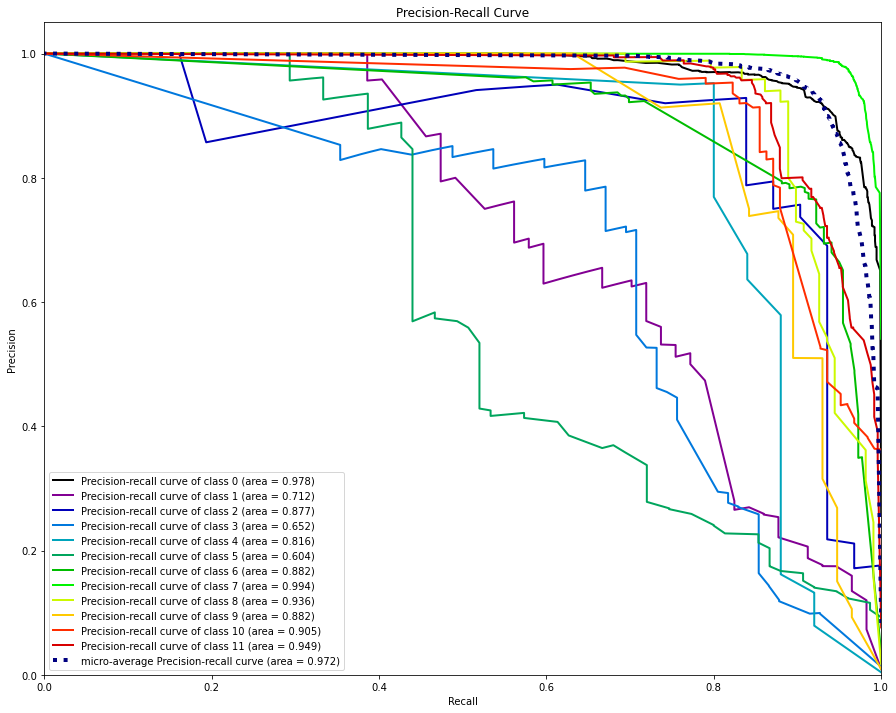

0.9243630573248408


In [69]:
skplt.metrics.plot_precision_recall(y_val, rf_y_prob, figsize=(15, 12))
plt.show()
print(accuracy_score(y_val, rf_y_pre))

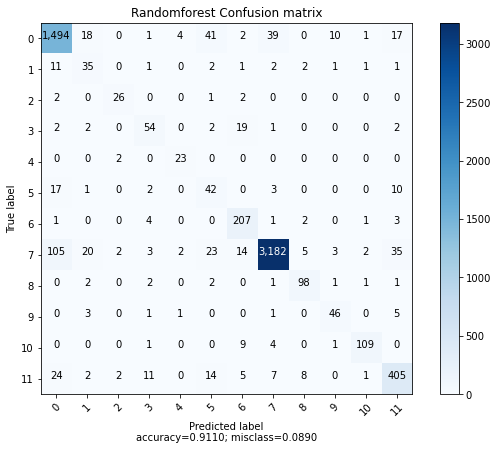

In [67]:
rf_cm = confusion_matrix(y_val, rf_y_pre)
plot_confusion_matrix(rf_cm, range(12),
                      title='Randomforest Confusion matrix',
                      cmap=None,
                      normalize=False)

In [ ]:
print(classification_report(y_val, rf_y_pre))

## Model Stacking

#### Ensemble architecture:
* 1st level:
    * XGBoost
    * LightGBM
    * KNN
    * SVM
    * Randomforest
* 2nd level;
    * Decision Tree
    
#### Here is an  image to help the understanding
 
 <img src=".././Data/Figures/model stacking.jpg" width="400">

In [72]:
first_level = pd.DataFrame()
first_level['xgb'] = xgb_y_pre
first_level['lgb'] = lgb_y_pre
first_level['knn'] = knn_y_pre
first_level['svm'] = svm_y_pre
first_level['rf'] = svm_y_pre
first_level['label'] = y_val
first_level.head(5)

,xgb,lgb,knn,svm,rf,label
0,7,7,7,7,7,7
1,6,6,6,6,6,6
2,6,6,6,6,6,6
3,7,7,7,7,7,7
4,7,7,7,7,7,7


In [ ]:
# Dataset that will be the test set of the ensemble model.
first_level_test = pd.DataFrame()
first_level_test['xgb'] = xgb_test_pred
first_level_test['lgb'] = lgb_test_pred
first_level_test['knn'] = knn_test_pred
first_level_test['svm'] = svm_test_pred
first_level_test['rf'] = svm_test_pred
first_level.head(5)

## One-Class classification

### T-SNE

In [124]:
tsne = manifold.TSNE(n_components=2, verbose=1, perplexity=100,
                     random_state=0, n_jobs=-1)
tsne_train = tsne.fit_transform(x_train)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 25119 samples in 4.994s...
[t-SNE] Computed neighbors for 25119 samples in 31.581s...
[t-SNE] Computed conditional probabilities for sample 1000 / 25119
[t-SNE] Computed conditional probabilities for sample 2000 / 25119
[t-SNE] Computed conditional probabilities for sample 3000 / 25119
[t-SNE] Computed conditional probabilities for sample 4000 / 25119
[t-SNE] Computed conditional probabilities for sample 5000 / 25119
[t-SNE] Computed conditional probabilities for sample 6000 / 25119
[t-SNE] Computed conditional probabilities for sample 7000 / 25119
[t-SNE] Computed conditional probabilities for sample 8000 / 25119
[t-SNE] Computed conditional probabilities for sample 9000 / 25119
[t-SNE] Computed conditional probabilities for sample 10000 / 25119
[t-SNE] Computed conditional probabilities for sample 11000 / 25119
[t-SNE] Computed conditional probabilities for sample 12000 / 25119
[t-SNE] Computed conditional probabilities for s

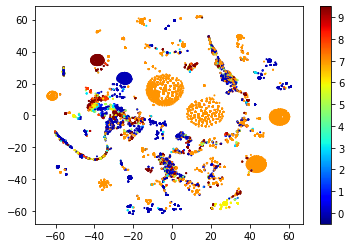

In [125]:
fig = plt.figure()
plt.scatter(tsne_train[:, 0], tsne_train[:, 1],
            c=y_train, s=1, cmap=plt.cm.get_cmap("jet"))
plt.colorbar(ticks=range(12))
plt.clim(-0.5, 9.5)
plt.show()
fig.savefig('../Data/Figures/tsne.eps')

In [20]:
pca = PCA(n_components='mle')
pca_results = pca.fit_transform(x_train)

In [22]:
joblib.dump(pca, '.././Data/pca_mle.m')

['.././Data/pca_mle.m']

In [16]:
pca = joblib.load('.././Data/pca_mle.m')
pca_results = pca.fit_transform(x_train)

### one class svm

In [17]:
tmp = pd.DataFrame(pca_results)
tmp['label'] = y_train
train0 = tmp[tmp['label'] == 0].drop(['label'], axis=1)
train1 = tmp[tmp['label'] == 1].drop(['label'], axis=1)
train2 = tmp[tmp['label'] == 2].drop(['label'], axis=1)
train3 = tmp[tmp['label'] == 3].drop(['label'], axis=1)
train4 = tmp[tmp['label'] == 4].drop(['label'], axis=1)
train5 = tmp[tmp['label'] == 5].drop(['label'], axis=1)
train6 = tmp[tmp['label'] == 6].drop(['label'], axis=1)
train7 = tmp[tmp['label'] == 7].drop(['label'], axis=1)
train8 = tmp[tmp['label'] == 8].drop(['label'], axis=1)
train9 = tmp[tmp['label'] == 9].drop(['label'], axis=1)
train10 = tmp[tmp['label'] == 10].drop(['label'], axis=1)
train11 = tmp[tmp['label'] == 11].drop(['label'], axis=1)

In [18]:
x_val = pca.transform(x_val)

In [27]:
np.shape(pca_results)

(25119, 693)

In [19]:
tmp = []
clf0 = OneClassSVM(nu=0.01, kernel="rbf", gamma='auto')
clf0.fit(train0)
tmp.append(clf0.predict(x_val).tolist())

clf1 = OneClassSVM(nu=0.01, kernel="rbf", gamma='auto')
clf1.fit(train1)
tmp.append(clf1.predict(x_val).tolist())

clf2 = OneClassSVM(nu=0.01, kernel="rbf", gamma='auto')
clf2.fit(train2)
tmp.append(clf2.predict(x_val).tolist())

clf3 = OneClassSVM(nu=0.01, kernel="rbf", gamma='auto')
clf3.fit(train3)
tmp.append(clf3.predict(x_val).tolist())

clf4 = OneClassSVM(nu=0.01, kernel="rbf", gamma='auto')
clf4.fit(train4)
tmp.append(clf4.predict(x_val).tolist())

clf5 = OneClassSVM(nu=0.01, kernel="rbf", gamma='auto')
clf5.fit(train5)
tmp.append(clf5.predict(x_val).tolist())

clf6 = OneClassSVM(nu=0.01, kernel="rbf", gamma='auto')
clf6.fit(train6)
tmp.append(clf6.predict(x_val).tolist())

clf7 = OneClassSVM(nu=0.01, kernel="rbf", gamma='auto')
clf7.fit(train7)
tmp.append(clf7.predict(x_val).tolist())

clf8 = OneClassSVM(nu=0.01, kernel="rbf", gamma='auto')
clf8.fit(train8)
tmp.append(clf8.predict(x_val).tolist())

clf9 = OneClassSVM(nu=0.01, kernel="rbf", gamma='auto')
clf9.fit(train9)
tmp.append(clf9.predict(x_val).tolist())

clf10 = OneClassSVM(nu=0.01, kernel="rbf", gamma='auto')
clf10.fit(train10)
tmp.append(clf10.predict(x_val).tolist())

clf11 = OneClassSVM(nu=0.01, kernel="rbf", gamma='auto')
clf11.fit(train11)
tmp.append(clf11.predict(x_val).tolist())

In [20]:
haha = pd.DataFrame(tmp)
haha.T

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1,-1,1,1,1,1,1,1,1,1,1
1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1
2,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,-1,1,1,1,1,-1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6275,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,1
6276,1,1,1,1,1,1,1,1,1,1,1,1
6277,1,-1,1,1,1,1,1,1,1,1,1,1
6278,-1,1,-1,-1,-1,-1,1,-1,-1,-1,1,-1


In [21]:
tmp = []
tmp.append(clf0.predict(pca_results).tolist())
tmp.append(clf1.predict(pca_results).tolist())
tmp.append(clf2.predict(pca_results).tolist())
tmp.append(clf3.predict(pca_results).tolist())
tmp.append(clf4.predict(pca_results).tolist())
tmp.append(clf5.predict(pca_results).tolist())
tmp.append(clf6.predict(pca_results).tolist())
tmp.append(clf7.predict(pca_results).tolist())
tmp.append(clf8.predict(pca_results).tolist())
tmp.append(clf9.predict(pca_results).tolist())
tmp.append(clf10.predict(pca_results).tolist())
tmp.append(clf11.predict(pca_results).tolist())

In [22]:
ocspre = pd.DataFrame(tmp)
ocspre.T

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,-1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,-1,1,1,1,1,-1,1,1
2,1,1,-1,-1,-1,-1,1,1,1,-1,1,1
3,1,1,-1,-1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
25114,1,-1,-1,1,1,1,-1,1,1,1,1,-1
25115,1,1,-1,-1,-1,-1,1,1,1,-1,1,1
25116,1,1,1,1,1,1,1,1,1,1,1,1
25117,1,1,1,1,1,1,1,1,1,1,1,1


In [23]:
xgb = xgboost.XGBClassifier()
xgb.fit(ocspre.T.values, y_train.values.ravel())
xgb_y_pre = xgb.predict(haha.T.values)

In [24]:
print(classification_report(y_val, xgb_y_pre))

              precision    recall  f1-score   support

           0       0.63      0.49      0.55      1627
           1       1.00      0.11      0.19        57
           2       0.52      0.45      0.48        31
           3       0.62      0.12      0.20        82
           4       0.84      0.64      0.73        25
           5       0.71      0.07      0.12        75
           6       0.60      0.27      0.38       219
           7       0.71      0.88      0.78      3396
           8       0.00      0.00      0.00       108
           9       0.00      0.00      0.00        57
          10       0.93      0.35      0.51       124
          11       0.50      0.60      0.54       479

    accuracy                           0.67      6280
   macro avg       0.59      0.33      0.37      6280
weighted avg       0.65      0.67      0.64      6280



C:\Users\rongx\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import transforms
import torchvision.datasets as dst
from torchvision.utils import save_image

In [33]:
x_train

,data0,data1,data2,data3,data4,data5,data6,data7,data8,data9,...,data2464,data2469,data2475,data2477,data2479,data2484,data2485,data2486,data2487,data2488
16102,84,0,0.0,15,22,13,3,31,13,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12280,309,0,0.0,4,13,10,13,37,18,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14158,217,0,0.0,14,5,2,0,8,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22944,157,0,0.0,3,23,4,0,14,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7795,7,0,0.0,5,3,7,5,33,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17106,2,0,0.0,1,8,4,8,35,23,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20925,217,0,0.0,14,5,2,0,8,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7568,84,0,0.0,14,22,11,2,28,12,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13184,2,0,0.0,4,1,1,3,19,16,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras.datasets import mnist
from keras.utils import to_categorical


batch_size = 100
original_dim = 1194
latent_dim = 2  # 隐变量取2维只是为了方便后面画图
intermediate_dim = 256
epochs = 100
num_classes = 12


# 加载MNIST数据集
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)
y_train = to_categorical(y_train, num_classes=12)
y_train = to_categorical(y_test, num_classes=12)
x_train = np.reshape(x_train, (len(x_train), original_dim))
x_test = np.reshape(X_test_keras, (len(X_test_keras), original_dim))


x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x)

# 算p(Z|X)的均值和方差
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

y = Input(shape=(num_classes,))  # 输入类别
yh = Dense(latent_dim)(y)  # 这里就是直接构建每个类别的均值

# 重参数技巧


def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=K.shape(z_mean))
    return z_mean + K.exp(z_log_var / 2) * epsilon


# 重参数层，相当于给输入加入噪声
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# 解码层，也就是生成器部分
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# 建立模型
vae = Model([x, y], [x_decoded_mean, yh])

# xent_loss是重构loss，kl_loss是KL loss
xent_loss = K.sum(K.binary_crossentropy(x, x_decoded_mean), axis=-1)

# 只需要修改K.square(z_mean)为K.square(z_mean - yh)，也就是让隐变量向类内均值看齐
kl_loss = - 0.5 * K.sum(1 + z_log_var -
                        K.square(z_mean - yh) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)

# add_loss是新增的方法，用于更灵活地添加各种loss
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
vae.summary()

vae.fit([x_train, y_train],
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=([x_test, y_test], None))


# 构建encoder，然后观察各个数字在隐空间的分布
encoder = Model(x, z_mean)

x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test_)
plt.colorbar()
plt.show()

# 构建生成器
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

# 输出每个类的均值向量
mu = Model(y, yh)
mu = mu.predict(np.eye(num_classes))

# 观察能否通过控制隐变量的均值来输出特定类别的数字
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

output_digit = 9  # 指定输出数字

# 用正态分布的分位数来构建隐变量对
grid_x = norm.ppf(np.linspace(0.05, 0.95, n)) + mu[output_digit][1]
grid_y = norm.ppf(np.linspace(0.05, 0.95, n)) + mu[output_digit][0]

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()